### Educational Purpose
- The Notebook analyses the dataset containing **Salary Details of 2022 Grads**. The dataset is publicly available @ Kaggle. 
- Link - https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022

### Context
- **Contribution to GDP:** 
  - IT industry accounted for 8% of India's GDP in 2020.

- **Revenue Statistics (FY 2021):**
  - Total revenue estimated at US Dollars 194 billion, with a YoY increase of 2.3%.
  - Domestic income stood at US Dollar 45 billion, while export revenue reached US Dollar 150 billion.

- **Employment:**
  - The IT-BPM sector employs 4.5 million people as of March 2021.
  - High employee attrition rate is a significant challenge in the industry.

- **Concerns and Challenges:**
  - Skyrocketing resignations across all levels.
  - Infamous for exploiting cheap labor due to its status as a global outsourcing hub.
  - Concerns about job losses due to automation driven by artificial intelligence (AI).



### DataSet Description

- This Dataset contains information on **22700+ Software Professionals with different features** like their Salaries (₹), Name of the Company, Company Rating, Number of times Salaries Reported, and Location of the Company.

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [345]:
# URL for Software Professional Salaries
url_Soft = "https://raw.githubusercontent.com/Gowtham-Sivam/Data_Analysis/main/1.%20Salary%20Analysis/1.%20Salary%20Analysis%20-%202022%20Grads/Data/Software_Industry_Salary_Dataset.csv"

# Read the Software Professional Salaries into a DataFrame
df_Soft = pd.read_csv(url_Soft)
df_Soft.head() 

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


#### Rough Analysis to Understand High Level Stats

In [346]:
df_Soft['Rating'].describe()

count    22770.000000
mean         3.918213
std          0.519675
min          1.000000
25%          3.700000
50%          3.900000
75%          4.200000
max          5.000000
Name: Rating, dtype: float64

In [347]:
# Number of entries from each company
df_Soft['Company Name'].value_counts()

Company Name
Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
                                 ... 
Talent Anywhere                     1
WisdmLabs                           1
Softdel                             1
Dentsu                              1
Nextgen Innovation Labs             1
Name: count, Length: 11260, dtype: int64

In [348]:
df_Soft['Company Name'].describe()

count                         22769
unique                        11260
top       Tata Consultancy Services
freq                            271
Name: Company Name, dtype: object

In [356]:
df_Soft['Job Roles'].describe()

count     22770
unique       11
top         SDE
freq       8183
Name: Job Roles, dtype: object

In [350]:
df_Soft['Salary'].describe()

count    2.277000e+04
mean     6.953872e+05
std      8.843990e+05
min      2.112000e+03
25%      3.000000e+05
50%      5.000000e+05
75%      9.000000e+05
max      9.000000e+07
Name: Salary, dtype: float64

- 1st quartile salary is 300,000 Indian Rupees.
- 2nd / Median salary is 500,000 Indian Rupees.
- 3rd quartile salary is 900,000 Indian Rupees.

In [351]:
df_Soft['Location'].describe()

count         22770
unique           10
top       Bangalore
freq           8264
Name: Location, dtype: object

In [352]:
df_Soft['Location'].value_counts()

Location
Bangalore         8264
Hyderabad         4467
New Delhi         4176
Chennai           2458
Pune              2134
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Kerala             108
Jaipur              81
Name: count, dtype: int64

### Company Specific Analysis 
- Select **Company** & **Location** of the company to Understand Insights 

In [417]:
# Put company name here, location variable is available in the below cells for you to figure out
company_name = 'Amazon'

In [418]:
sem = 0
for company in list(df_Soft['Company Name'].unique()):
    if str(company_name).lower() in str(company).lower():
        print(company)
        if sem == 0:
            sem = 1
            company_name = str(company).split()[0]

Amazon
Amazon Prime Now
Amazon Flex
Amazon Payment Services
Amazon Lab126
Amazon India
Amazon Robotics
UFAM - Universidade Federal do Amazonas


In [419]:
# company_name = 
print("Default Selected - ", company_name, "(If required change the above variable in this cell)")

Default Selected -  Amazon (If required change the above variable in this cell)


In [420]:
#Filtering the data based on company
df_company = df_Soft[df_Soft['Company Name']== company_name]
df_company.head(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
153,3.8,Amazon,Android Developer,228000,1,Bangalore,Full Time,Android
294,3.8,Amazon,Android Developer,300000,1,Bangalore,Full Time,Android
1455,3.8,Amazon,Android Software Engineer,624000,1,Hyderabad,Full Time,Android
1973,3.8,Amazon,Android Developer - Intern,984000,1,New Delhi,Intern,Android
2030,3.8,Amazon,Android Developer,1900000,1,New Delhi,Full Time,Android
2955,3.8,Amazon,Backend Developer,672000,1,Bangalore,Full Time,Backend
2956,3.8,Amazon,Backend Developer,2800000,1,Bangalore,Full Time,Backend
3187,3.8,Amazon,SDE-2 Backend,2300000,4,Bangalore,Full Time,Backend
3312,3.8,Amazon,Backend Engineer,3300000,1,Bangalore,Full Time,Backend
3607,3.8,Amazon,SDE-2 Backend,3300000,1,Hyderabad,Full Time,Backend


In [421]:
df_company['Location'].value_counts()

Location
Bangalore         48
Hyderabad         45
Chennai           32
New Delhi         27
Mumbai            11
Pune              11
Kolkata            5
Madhya Pradesh     4
Jaipur             1
Name: count, dtype: int64

In [422]:

# Group the DataFrame by 'Location'
grouped_by_location = df_company.groupby('Location')

# count of entries for each location
location_counts = grouped_by_location.size()

# Calculate the total salary and total count of entries for each location
total_salary_by_location = grouped_by_location['Salary'].sum()
total_count_by_location = grouped_by_location.size()

# Calculate the weighted average salary for each location
weighted_average_salary_by_location = total_salary_by_location / total_count_by_location

# Calculate the mean rating for each location
location_mean_rating = grouped_by_location['Rating'].mean()

# Find the most repeated job role for each location
most_repeated_job_title = grouped_by_location['Job Roles'].apply(lambda x: x.mode().iloc[0])

# Create a DataFrame with the required information
df_company_location_info = pd.DataFrame({
    'Number of Entries in Dataset': location_counts,
    'Min Salary': grouped_by_location['Salary'].min(),
    'Max Salary': grouped_by_location['Salary'].max(),
    'Mean Salary': weighted_average_salary_by_location,  # Using weighted average here
    'Mean Rating': location_mean_rating,
    'Most Repeated Job Title': most_repeated_job_title
})


In [423]:
df_company_location_info.sort_values(by = 'Mean Salary')

,Number of Entries in Dataset,Min Salary,Max Salary,Mean Salary,Mean Rating,Most Repeated Job Title
Location,,,,,,
Madhya Pradesh,4,200000,696000,3.638000e+05,3.8,SDE
Jaipur,1,468000,468000,4.680000e+05,3.8,SDE
Mumbai,11,100000,2300000,7.818182e+05,3.8,SDE
New Delhi,27,100000,2700000,1.056889e+06,3.8,SDE
Chennai,32,33792,4500000,1.133056e+06,3.8,SDE
Pune,11,200000,2500000,1.179636e+06,3.8,SDE
Hyderabad,45,100000,5600000,1.191467e+06,3.8,SDE
Bangalore,48,100000,5700000,1.289500e+06,3.8,SDE
Kolkata,5,100000,9850000,2.708000e+06,3.8,SDE


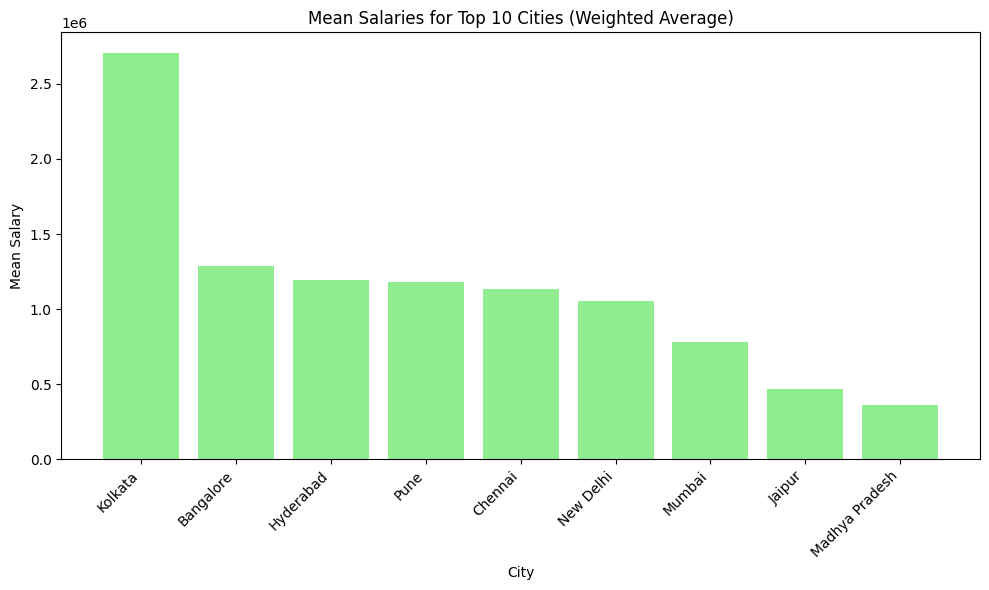

In [424]:
# Sort the DataFrame by mean salary in descending order
sorted_df = df_company_location_info.sort_values(by='Mean Salary', ascending=False)

# Select the top 10 cities
top_10_cities = sorted_df.head(10)

# Plotting the top 10 cities based on mean salary
plt.figure(figsize=(10, 6))
plt.bar(top_10_cities.index, top_10_cities['Mean Salary'], color='lightgreen')
plt.title('Mean Salaries for Top 10 Cities (Weighted Average)')
plt.xlabel('City')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [425]:
# Specify the location for further analysis
location = 'Hyderabad'

In [426]:
# Filter the DataFrame for the specified location
df_company_location = df_company[df_company['Location'] == location]
df_company_location['Rating'].describe()

count    4.500000e+01
mean     3.800000e+00
std      1.347322e-15
min      3.800000e+00
25%      3.800000e+00
50%      3.800000e+00
75%      3.800000e+00
max      3.800000e+00
Name: Rating, dtype: float64

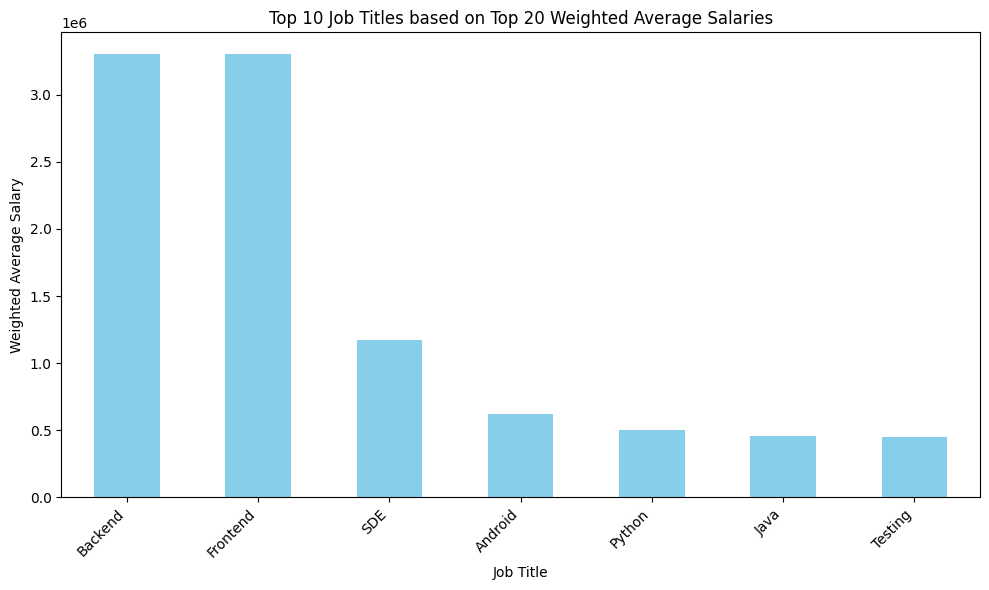

In [427]:
# Calculate the total salary and total count of entries for each job title
total_salary_by_job_title = df_company_location.groupby('Job Roles')['Salary'].sum()
total_count_by_job_title = df_company_location['Job Roles'].value_counts()

# Calculate the weighted average salary for each job title
weighted_average_salary_by_job_title = total_salary_by_job_title / total_count_by_job_title

# Sort the weighted average salaries in descending order and select the top 20
top_20_weighted_average_salaries = weighted_average_salary_by_job_title.sort_values(ascending=False).head(20)

# Plotting the top 10 job titles based on the top 20 weighted average salaries
top_10_job_titles = top_20_weighted_average_salaries.head(10)
top_10_job_titles.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Job Titles based on Top 20 Weighted Average Salaries')
plt.xlabel('Job Title')
plt.ylabel('Weighted Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### City Specific Analysis

In [455]:
print("Here are the list of cities: ")
df_Soft['Location'].value_counts()

Here are the list of cities: 


Location
Bangalore         8264
Hyderabad         4467
New Delhi         4176
Chennai           2458
Pune              2134
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Kerala             108
Jaipur              81
Name: count, dtype: int64

In [456]:
# Choose a location 
location = 'Bangalore'

In [457]:
#filter the companies from that location
df_location = df_Soft[df_Soft['Location'] == location]

# List of companies in the selected location
list(df_location['Company Name'].unique())

['Sasken',
 'Advanced Millennium Technologies',
 'Unacademy',
 'SnapBizz Cloudtech',
 'Appoids Tech Solutions',
 'Freelancer',
 'SQUARE N CUBE',
 'Samsung R&D Institute India - Bangalore',
 'DXMinds Technologies',
 'Endeavour Software Technologies',
 'Craft Silicon',
 'Baronford & Associates',
 'Wibmo',
 'Retail Pulse',
 'Bookmyshow',
 'Knowledge Flex',
 'Novopay Solutions',
 'WealthEngine',
 'J.P. Morgan',
 'Acviss',
 'Fresher',
 'MedOnGo',
 'Nuclei',
 'eSecForte Technologies',
 'Moveinsync Technology Solutions',
 'Tech Mahindra',
 'ThiDiff Technologies',
 'Retranz Infolabs',
 'FicusLot',
 'KrazyBee',
 'powerplay app',
 'Dcoder',
 'Masai School',
 'Integra Micro Software Services (P)',
 'DocsApp',
 'Vispara Technosoft',
 'Vmoksha Technologies',
 'Artoo',
 'Edelweiss Financial Services',
 'Hubbler',
 'L&T Technology Services',
 'Rossitek Mobile Apps Development',
 'Pricyfy',
 'MYNEWCAR',
 'IBM',
 'Panel Coder Software Technologies',
 'Knitter',
 '3Embed Software Technologies',
 'Web Di

In [458]:
print(f'Total Companies in {location} = ', len(list(df_location['Company Name'].unique())))

Total Companies in Bangalore =  4468


##### On this city what are the top 10 well paid job roles

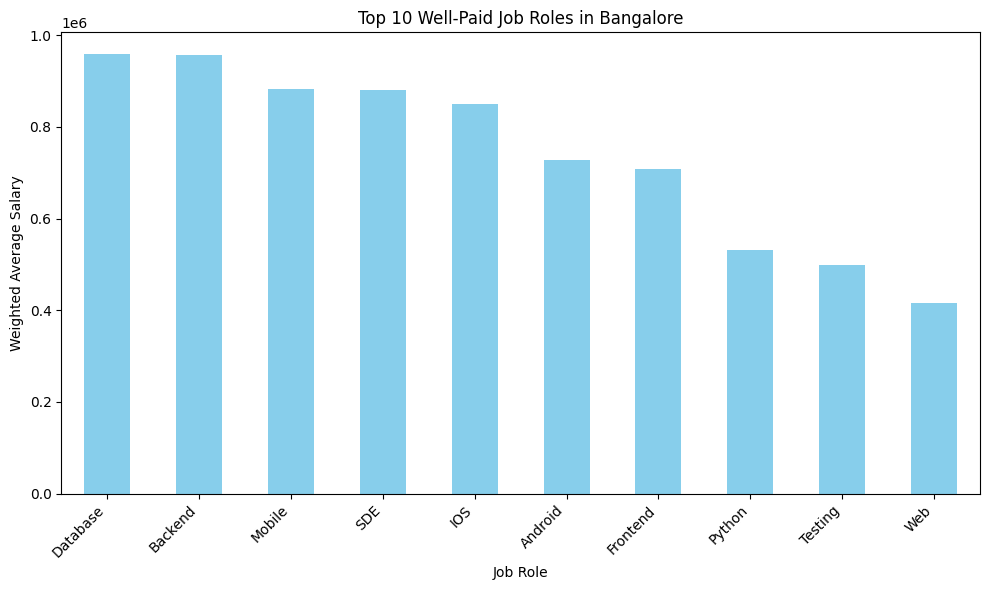

In [463]:
# Calculate the total salary and the count of employees for each job role in the specified location
total_salary_by_job_role = df_location.groupby('Job Roles')['Salary'].sum()
count_by_job_role = df_location['Job Roles'].value_counts()

# Calculate the weighted average salary for each job role
weighted_average_salary_by_job_role = total_salary_by_job_role / count_by_job_role

# Sort the weighted average salaries in descending order and select the top 10
top_10_job_roles = weighted_average_salary_by_job_role.sort_values(ascending=False).head(10)

# Plot the top 10 well-paid job roles
plt.figure(figsize=(10, 6))
top_10_job_roles.plot(kind='bar', color='skyblue')
plt.title('Top 10 Well-Paid Job Roles in {}'.format(location))
plt.xlabel('Job Role')
plt.ylabel('Weighted Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### On this city what are the top n well paying companies? 

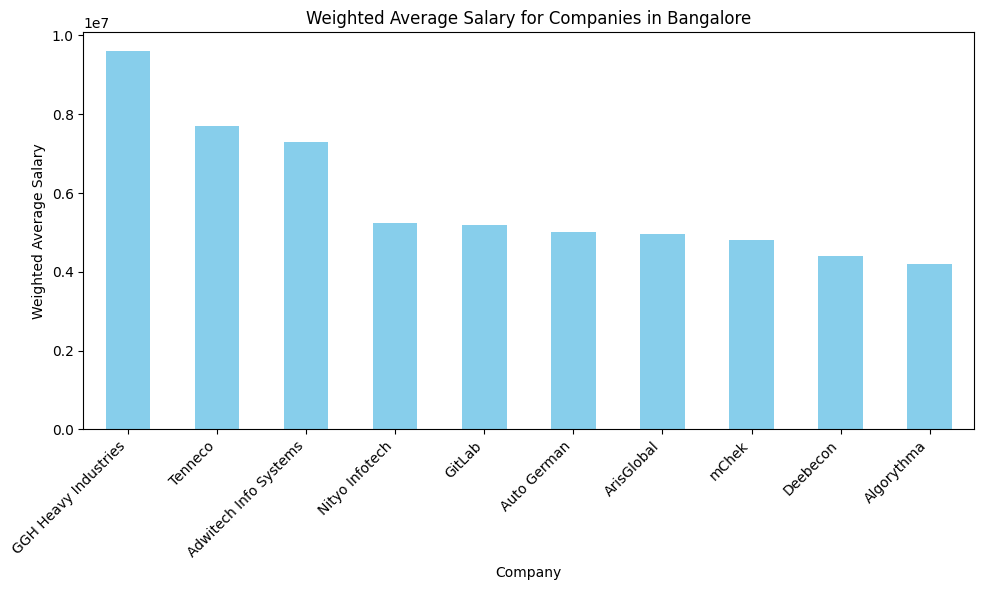

In [480]:
# Calculate the weighted average salary for each company based on the number of reported salaries
weighted_average_salary_by_company = df_location.groupby('Company Name').apply(lambda x: (x['Salary'] * x['Salaries Reported']).sum() / x['Salaries Reported'].sum())

# Plot the companies and their weighted average salaries
plt.figure(figsize=(10, 6))
weighted_average_salary_by_company.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Weighted Average Salary for Companies in {}'.format(location))
plt.xlabel('Company')
plt.ylabel('Weighted Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [485]:
df_location['Employment Status'].value_counts()

Employment Status
Full Time     7210
Intern         798
Contractor     248
Trainee          8
Name: count, dtype: int64